# Stock Market Prediction And Forecasting Using Stacked LSTM

***Importing all the packages***

In [2]:
import math 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

***Loading the dataset in the dataframe***

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


***Checking for nan values in the dataset***

In [8]:
df.isnull().values.any()

False

As we can see that there is no null or nan values in the dataset

In [9]:
df['Close']

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [10]:
df['Open']

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

# Data Visualization

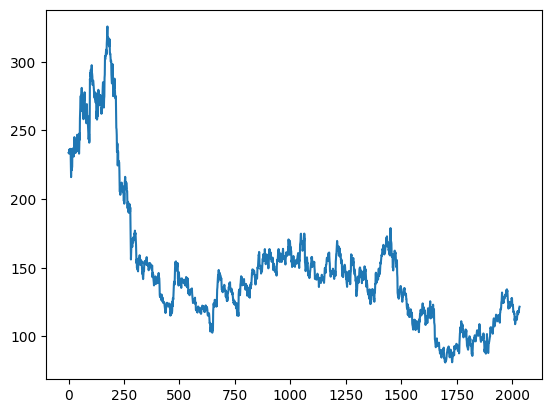

In [11]:
plt.plot(df['Close'])

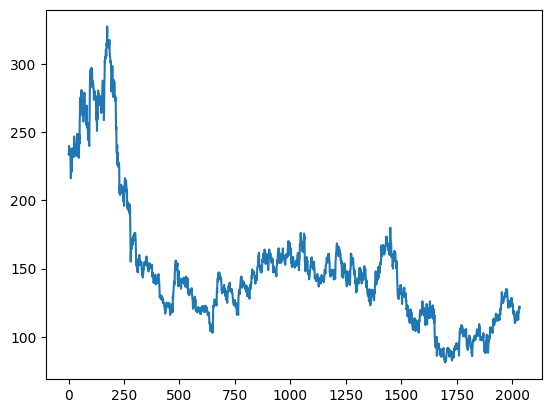

In [12]:
plt.plot(df['Open'])

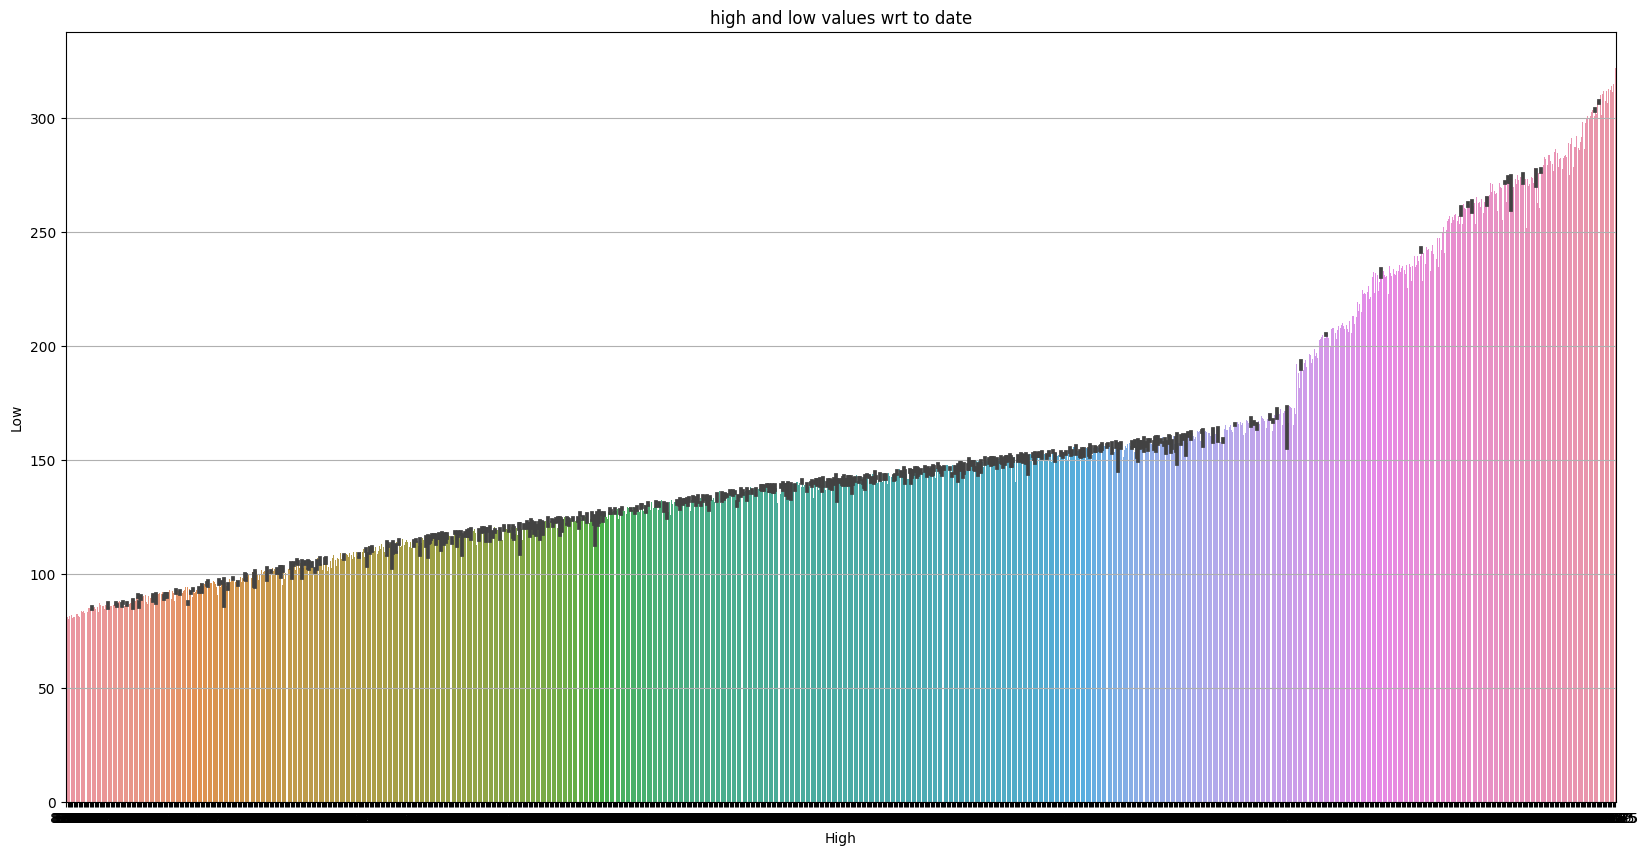

In [13]:
plt.figure(figsize = (20, 10))
plt.grid()
plt.title("high and low values wrt to date")
sns.barplot(x=df['High'], y=df['Low'], data = df);

Lets check the relationship b/w Close and Turnover to see how they are related to each other

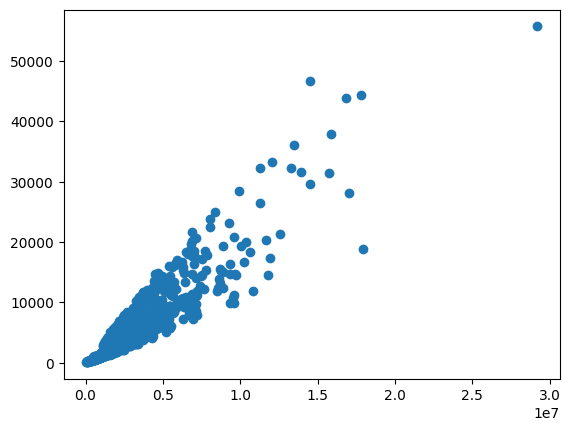

In [14]:
plt.scatter(df['Total Trade Quantity'], df['Turnover (Lacs)'])

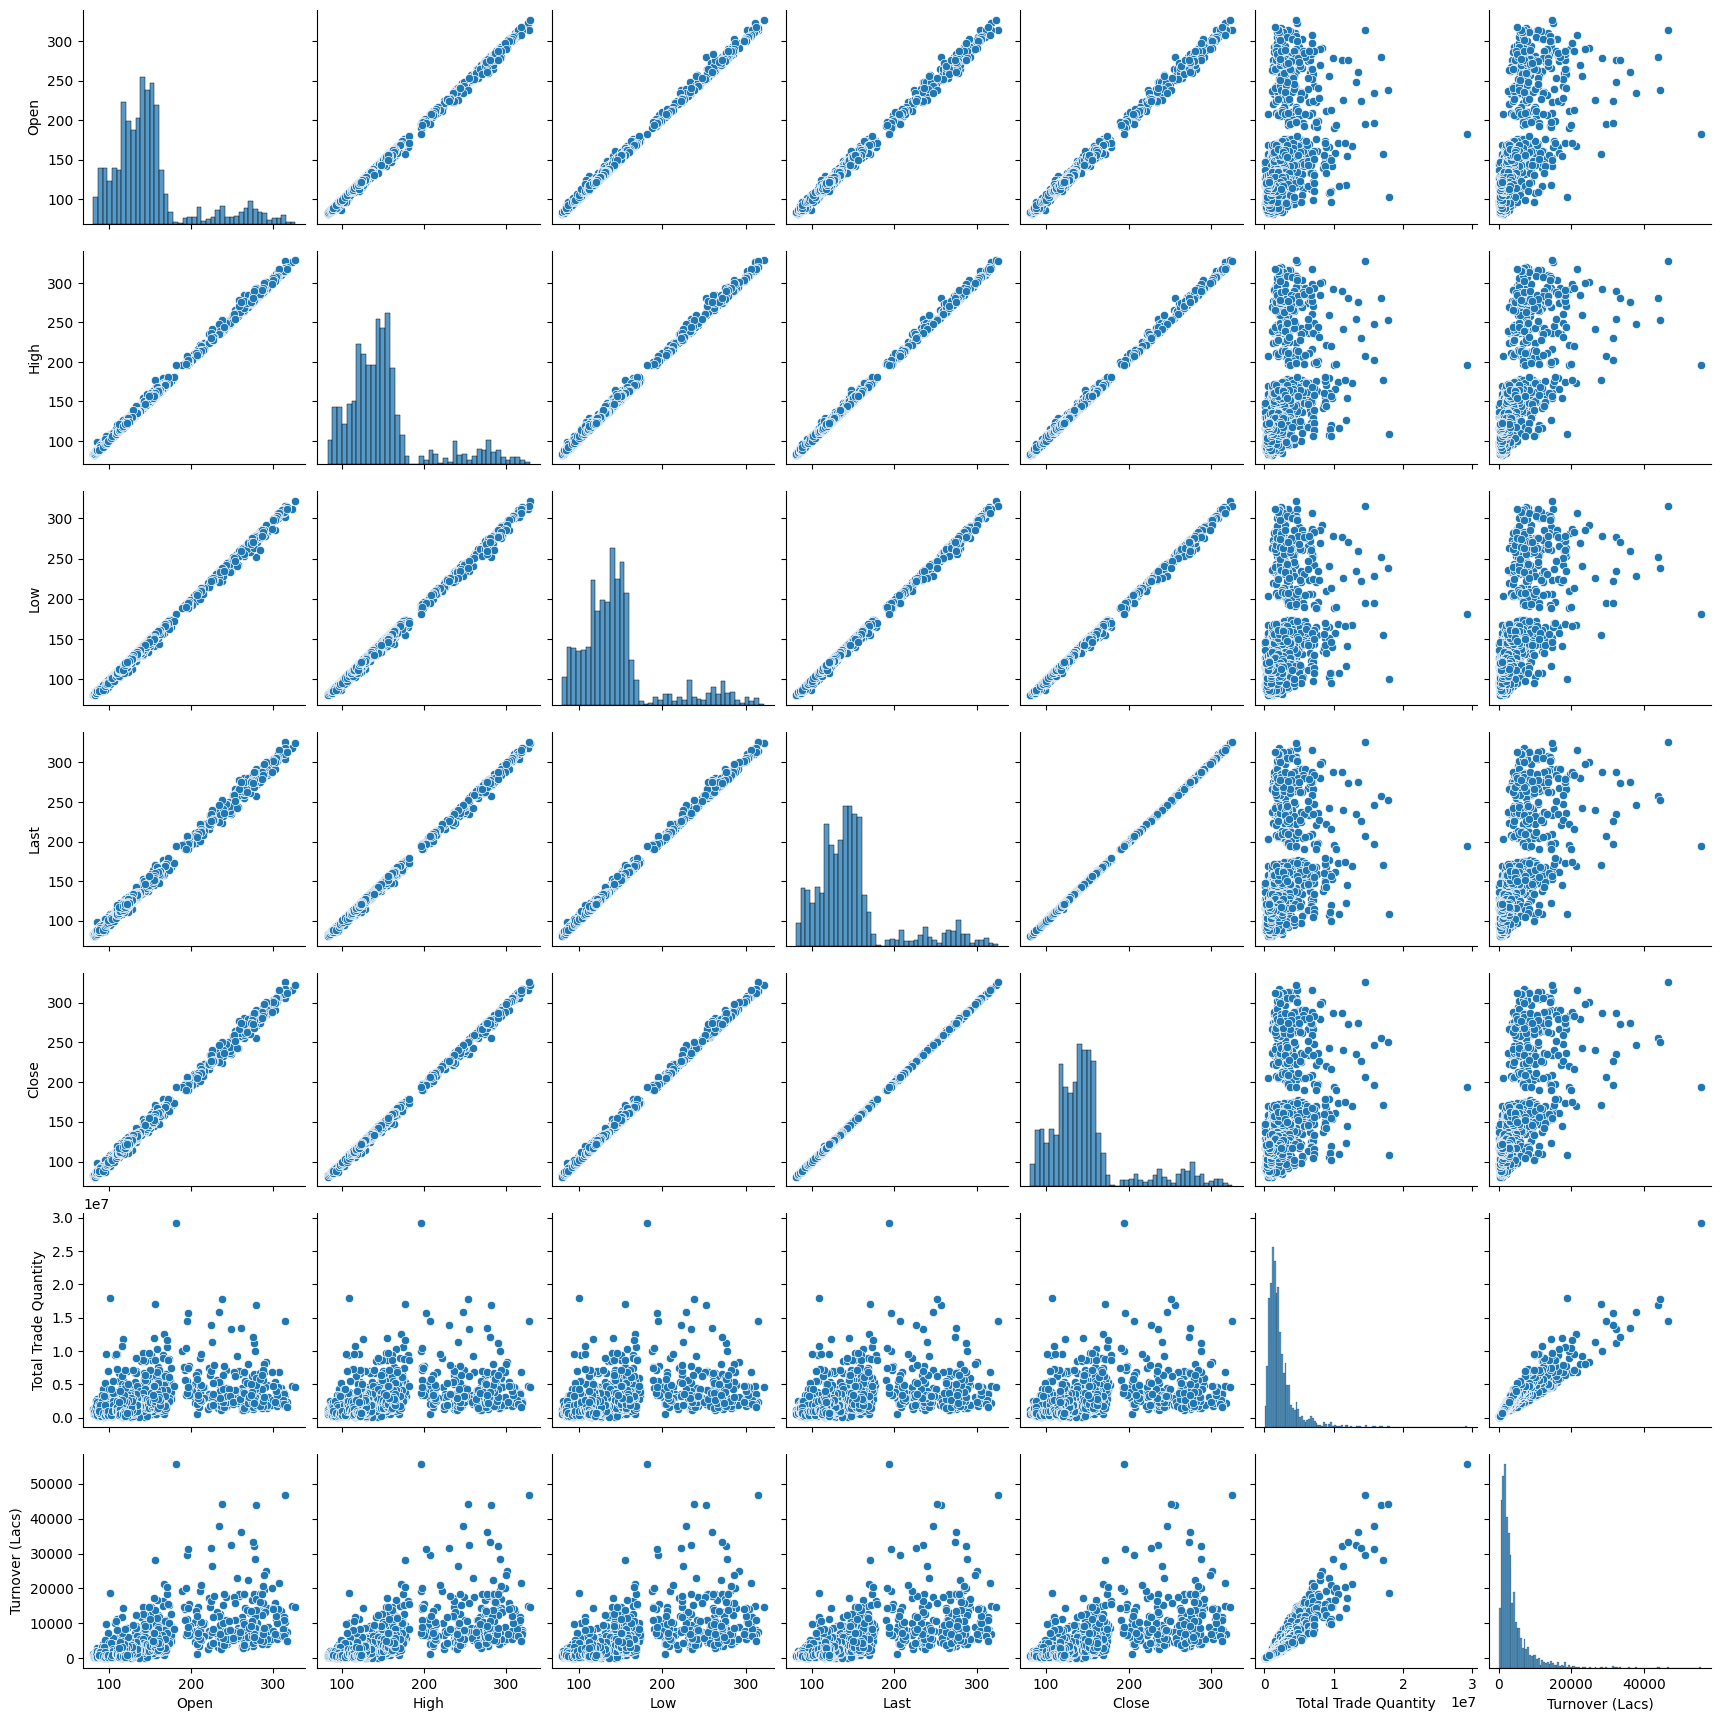

In [15]:
sns.pairplot(df)

# Spliting the data into training and testing data

In [16]:
x = df['Close']
print(x)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(np.array(x).reshape(-1,1))

In [18]:
training_size=int(len(x)*0.65)
test_size=len(x)-training_size
train_data,test_data=x[0:training_size,:],x[training_size:len(x),:1]

In [19]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 10s 228ms/step - loss: 0.0314 - val_loss: 0.0045
Epoch 2/100
20/20 [==============================] - 3s 148ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 3/100
20/20 [==============================] - 3s 142ms/step - loss: 0.0020 - val_loss: 8.9963e-04
Epoch 4/100
20/20 [==============================] - 3s 134ms/step - loss: 0.0017 - val_loss: 9.5268e-04
Epoch 5/100
20/20 [==============================] - 3s 135ms/step - loss: 0.0015 - val_loss: 9.5950e-04
Epoch 6/100
20/20 [==============================] - 3s 151ms/step - loss: 0.0014 - val_loss: 8.6827e-04
Epoch 7/100
20/20 [==============================] - 3s 157ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/100
20/20 [==============================] - 3s 153ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 3s 170ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 10/100
20/20 [==============================] - 3s 149ms/step - loss

20/20 [==============================] - 3s 151ms/step - loss: 3.2034e-04 - val_loss: 2.6978e-04
Epoch 77/100
20/20 [==============================] - 3s 155ms/step - loss: 3.2521e-04 - val_loss: 2.7380e-04
Epoch 78/100
20/20 [==============================] - 3s 147ms/step - loss: 3.1849e-04 - val_loss: 2.7941e-04
Epoch 79/100
20/20 [==============================] - 3s 146ms/step - loss: 3.0118e-04 - val_loss: 5.2016e-04
Epoch 80/100
20/20 [==============================] - 3s 145ms/step - loss: 4.4170e-04 - val_loss: 2.7260e-04
Epoch 81/100
20/20 [==============================] - 3s 142ms/step - loss: 3.1537e-04 - val_loss: 2.4791e-04
Epoch 82/100
20/20 [==============================] - 3s 143ms/step - loss: 3.1140e-04 - val_loss: 2.4884e-04
Epoch 83/100
20/20 [==============================] - 3s 143ms/step - loss: 3.3864e-04 - val_loss: 2.4086e-04
Epoch 84/100
20/20 [==============================] - 3s 142ms/step - loss: 3.0605e-04 - val_loss: 2.5766e-04
Epoch 85/100
20/20 [===

# Prdicting the values

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

20/20 [==============================] - 1s 29ms/step


# Evaluating the Model

In [27]:
score = model.evaluate(X_train, train_predict)

39/39 [==============================] - 2s 27ms/step - loss: 26927.7539


In [28]:
print(math.sqrt(score))

164.0967821325269


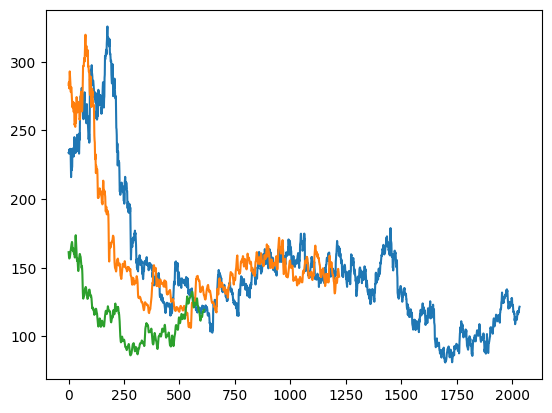

In [29]:
plt.plot(scaler.inverse_transform(x))
plt.plot(train_predict)
plt.plot(test_predict)
plt.show()

# Testing the Model

In [30]:
print(train_predict)

[[283.18945]
 [285.00082]
 [282.49026]
 ...
 [145.6071 ]
 [144.99043]
 [143.4701 ]]


In [31]:
print(test_predict)

[[161.32384 ]
 [158.64919 ]
 [157.22235 ]
 [156.68695 ]
 [156.94014 ]
 [157.62254 ]
 [158.26001 ]
 [159.47153 ]
 [161.34047 ]
 [162.63602 ]
 [163.22325 ]
 [164.59552 ]
 [165.39078 ]
 [167.28203 ]
 [167.78348 ]
 [168.76439 ]
 [168.20645 ]
 [165.39679 ]
 [163.01935 ]
 [162.36053 ]
 [163.76045 ]
 [164.19098 ]
 [162.45708 ]
 [160.8865  ]
 [160.3703  ]
 [160.5203  ]
 [159.3446  ]
 [158.48387 ]
 [157.44003 ]
 [158.94127 ]
 [164.93561 ]
 [172.58766 ]
 [173.67166 ]
 [170.0471  ]
 [166.5654  ]
 [164.27856 ]
 [160.09846 ]
 [156.35017 ]
 [154.99678 ]
 [155.17351 ]
 [156.50534 ]
 [153.72049 ]
 [150.56528 ]
 [147.76006 ]
 [147.60239 ]
 [150.0357  ]
 [153.345   ]
 [156.58215 ]
 [157.64906 ]
 [158.91359 ]
 [159.9678  ]
 [159.88689 ]
 [158.78949 ]
 [158.31248 ]
 [157.88469 ]
 [156.02856 ]
 [153.27515 ]
 [152.31467 ]
 [150.49379 ]
 [149.66031 ]
 [151.08589 ]
 [149.05547 ]
 [145.13168 ]
 [138.1001  ]
 [132.23502 ]
 [128.71329 ]
 [127.48729 ]
 [128.41347 ]
 [128.8071  ]
 [129.4009  ]
 [129.54727 ]
 [131.